In [1]:
using Distributions 
using StatsBase 
using KernelDensity 
using Plots
using TimeIt
include("Gaussian_mean.jl")
include("logistic_functions.jl") 

compare_1d (generic function with 1 method)

* Consider $X_1, \ldots, X_n \sim N(\xi, \Sigma)$. 

* We put a prior on $\xi$ as $\xi \sim N(0, \Sigma_{\text{prior}})$.

* We target the posterior $f( \xi \mid X_1, \ldots, X_n)$.

In [76]:
d = 100
ρ = 0.1
Σ_likelihood = ρ*ones(d,d)
for i in 1:d Σ_likelihood[i,i] = i end
Σ_prior = eye(d)
μ = rand(Normal(),d);

In [77]:
n = 200
X = rand(MvNormal(μ, Σ_likelihood), n)
Niter = 10^4;

#### Zigzag sampler:

In [78]:
start = time()
skeleton, bouncing_times, refreshments  = zigzag_Gaussian_mean(X, Σ_prior, Σ_likelihood, Niter, 0)
print(time() - start, " seconds to run \n")
print(refreshments, " refreshments")

3.482353925704956 seconds to run 
0 refreshments


#### Our method:

In [80]:
start = time()
max_times = ones(d)/10
chain, bounce_counter  = NRG_Gaussian_mean(X, Σ_prior, Σ_likelihood, Niter, max_times)
print(time() - start, " seconds to run \n")
print(sum(bounce_counter), " bounces \n")
print(sum(bounce_counter)/size(chain)[2], " bounces per step on average")

0.5851268768310547 seconds to run 
10005.0 bounces 
0.5833479097428721 bounces per step on average

#### Plot:

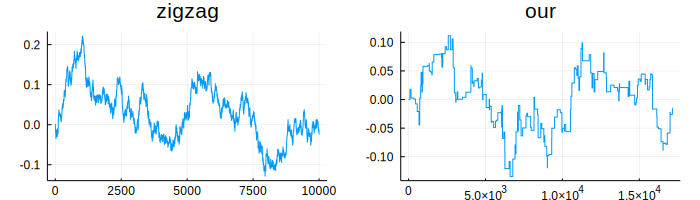

In [83]:
plot(size=(700,200), layout=(1,2))
plot!(skeleton[1,:], label="", subplot=1, title="zigzag")
plot!(chain[1,:], label="", subplot=2, title="our")

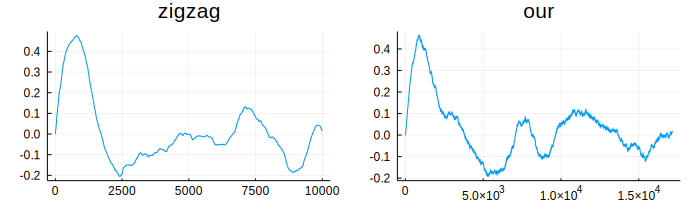

In [82]:
direction = rand(d)
direction /= sum(direction)
plot(size=(700,200), layout=(1,2))
plot!(skeleton'direction, label="", subplot=1, title="zigzag")
plot!(chain'direction, label="", subplot=2, title="our")